In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numba import jit
from matplotlib import animation, rc

In [2]:
@jit
def laplacian(ix, iy, s):
    ts = 0.0
    ts += s[ix-1, iy]
    ts += s[ix+1, iy]
    ts += s[ix, iy-1]
    ts += s[ix, iy+1]
    ts -= 4.0*s[ix, iy]
    return ts

In [3]:
@jit
def calc(u, u2):
    (L, _) = u.shape
    dt = 0.2
    Q = 1.0
    for ix in range(1, L-1):
        for iy in range(1, L-1):
            u2[ix, iy] = u[ix,iy] + laplacian(ix, iy, u)*dt
    h = L//2
    u2[h-6:h+6, h-6:h+6] += Q*dt

In [4]:
@jit
def simulation():
    L = 32
    u = np.zeros((L, L))
    u2 = np.zeros((L, L))
    r = []
    for i in range(1000):
        if i % 2 == 0:
            calc(u, u2)
        else:
            calc(u2, u)
        if i%10 == 0:
            r.append(u.copy())
    return r

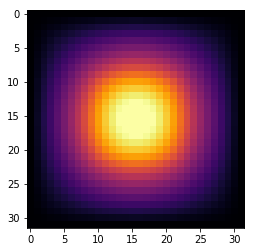

In [5]:
imgs = simulation()
fig = plt.figure()
im = plt.imshow(imgs[-1], cmap="inferno",vmin = 0, vmax = 30)

In [6]:
def update(i):
  im.set_array(imgs[i])
  return im,

ani = animation.FuncAnimation(fig, update, interval=50)
rc('animation', html='jshtml')
ani